# 🎓 **Taller 4.1: Taller de Medidas de Similitud y Disimilitud**


## OBJETIVOS DEL TALLER:
Comprender y aplicar diferentes medidas de similitud y disimilitud en conjuntos de datos, analizando su comportamiento en distintos contextos de distribución de datos. Implementar y calcular al menos 6 medidas de distancia diferentes:

* ✅Distancia Euclidiana (L2)
* ✅Distancia Manhattan (L1)
* ✅Distancia Chebyshev (L∞)
* ✅Similitud de Coseno
* ✅Distancia de Mahalanobis
* ✅Distancia de Jaccard

Representar gráficamente datasets en espacios bidimensionales

* ✅Visualizar centros y puntos de referencia en gráficos de dispersión
* ✅Interpretar relaciones espaciales a partir de representaciones visuales

# 🔧 **CONFIGURACIÓN INICIAL**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 8]

In [2]:
import scipy.stats as st

def visualize_dataset(x, y, ds_center, c1, c2):
  fig, ax = plt.subplots()
  ax.scatter(x, y)
  ds_center_r = [np.mean(x), np.mean(y)]
  print(f'Centro real del cluster: x={ds_center_r[0]:.2f}, y={ds_center_r[1]:.2f}')
  print(f'Centro del cluster utilizado para el ejemplo: x={ds_center[0]:.2f}, y={ds_center[1]:.2f}')
  ax.scatter(ds_center[0], ds_center[1], s=200, c='b')
  # plot candidates
  ax.scatter(c1[0], c1[1], s=200, c='r')
  ax.scatter(c2[0], c2[1], s=200, c='g', marker='v')
  deltaX = (max(x) - min(x))/10
  deltaY = (max(y) - min(y))/10
  xmin = min(x) - deltaX
  xmax = max(x) + deltaX
  ymin = min(y) - deltaY
  ymax = max(y) + deltaY
  # Create meshgrid
  xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
  positions = np.vstack([xx.ravel(), yy.ravel()])
  values = np.vstack([x, y])
  kernel = st.gaussian_kde(values)
  f = np.reshape(kernel(positions).T, xx.shape)
  # create gaussian contour lines
  cfset = ax.contourf(xx, yy, f, cmap='coolwarm', alpha=0.2)
  ax.imshow(np.rot90(f), cmap='coolwarm', extent=[xmin, xmax, ymin, ymax], alpha=0.2)
  # write labels
  cset = ax.contour(xx, yy, f, colors='k', linestyles='dotted')
  ax.clabel(cset, inline=1, fontsize=10)
  ax.set_xlabel('X')
  ax.set_ylabel('Y')
  plt.title('Kernel Gaussiano 2D')

In [3]:
def visualize_scatter(x, y, ds_center, c1, c2):
  ds_center_real= [np.mean(x), np.mean(y)]
  plt.figure(figsize=(8, 6))  # Tamaño del gráfico
  plt.scatter(x, y, color='blue', alpha=0.6, label='Puntos de datos')
  plt.scatter(ds_center[0], ds_center[1], color='red', marker='X', s=100, label='Centro [2, 2]')
  plt.scatter(ds_center_real[0], ds_center_real[1], color='y', marker='X', s=100, label='Centro Real')
  plt.scatter(c1[0], c1[1], s=200, c='red', label='Candidato 1 (rojo)')
  plt.scatter(c2[0], c2[1], s=200, c='green', marker='v', label='Candidato 2 (verde)')
  plt.xlabel('Variable 1 (data_var_1)')
  plt.ylabel('Variable 2 (data_var_2)')
  plt.title('Dataset 2D con Distribución Normal alrededor de [2, 2]')
  plt.grid(True, linestyle='--', alpha=0.5)
  plt.legend()
  plt.show()

# 📁 **CREAR LOS DATASETS Y GRAFIQUE SUS DISTRIBUCIONES**

In [4]:
# Crear un dataset artificial alrededor de un punto
def cargar_datasetDistNormal(n_data_points = 50, ds_center = np.array([2, 2])):
    # para hacer los experimentos reproducibles
    np.random.seed(42)
    # generamos los puntox en 2D con funcion normal, al rededor del centro
    data_var_1 = np.random.randn(n_data_points) + ds_center[0]
    data_var_2 = np.random.randn(n_data_points) + ds_center[1]
    return data_var_1, data_var_2

In [5]:
# Crear un dataset artificial alrededor de un punto con una relacion lineal de dependencia entre las variables
def cargar_datasetRelacionLineal(factor=np.array([1, 1]), n_data_points = 50, ds_center = np.array([2, 2])):
    # para hacer los experimentos reproducibles
    np.random.seed(42)
    # generar los datos con una relacion lineal
    data_var_1b = factor[0] * np.random.randn(n_data_points) + ds_center[0]
    data_var_2b = data_var_1b + factor[1] * np.random.randn(n_data_points)
    return data_var_1b, data_var_2b

In [6]:
# Crear un dataset artificial alrededor de un punto con una relacion cuadratica de dependencia entre las variables
def cargar_datasetRelacionCuadratica(coeficientes=np.array([1, 0, 0]),
                                     n_data_points=50,
                                     rango_x=(-5, 5)):
    #coeficientes : array de 3 elementos [a, b, c]
    #    Coeficientes de la ecuación cuadrática: y = a*x² + b*x + c
    # Para hacer los experimentos reproducibles
    np.random.seed(42)
    # Extraer coeficientes
    a, b, c = coeficientes
    # Generar valores x uniformemente distribuidos
    x = np.random.uniform(rango_x[0], rango_x[1], n_data_points)
    # Aplicar la transformación cuadrática
    y_ideal = a * x**2 + b * x + c
    # Añadir ruido aleatorio (proporcional al rango de y)
    rango_y = np.max(y_ideal) - np.min(y_ideal)
    ruido = 0.1 * rango_y * np.random.randn(n_data_points)
    y = y_ideal + ruido
    return x, y

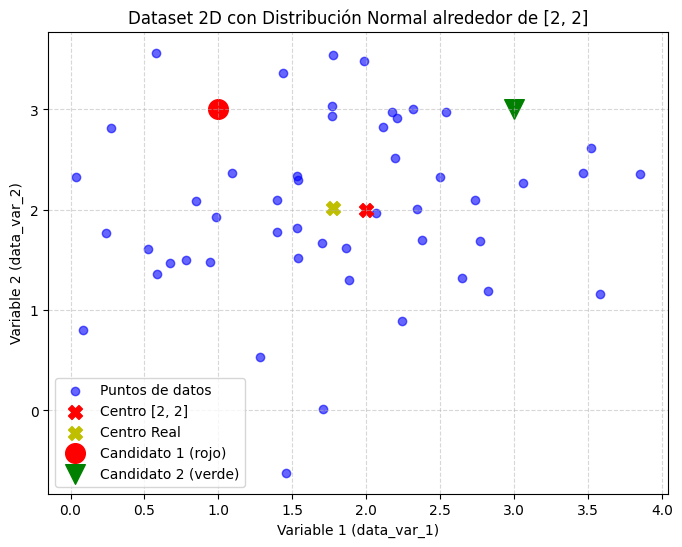

Centro real del cluster: x=1.77, y=2.02
Centro del cluster utilizado para el ejemplo: x=2.00, y=2.00


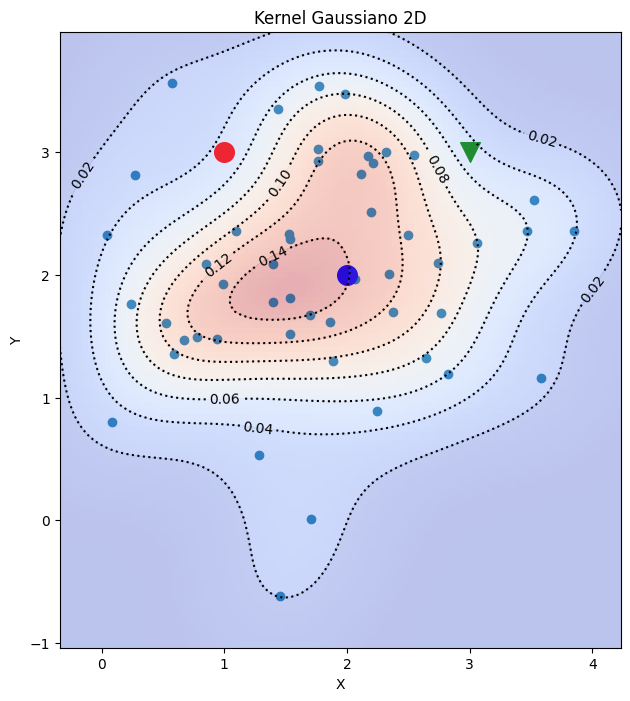

In [7]:
# Cargar dataset
ds_center = np.array([2, 2])
dx, dy =cargar_datasetDistNormal(50, ds_center)
# establecemos nuestros dos puntos candidatos de prueba
c1 = np.array([ds_center[0] - 1, 3])
c2 = np.array([ds_center[1] + 1, 3])
visualize_scatter(dx, dy, ds_center, c1, c2)
visualize_dataset(dx, dy, ds_center, c1, c2)

# 🎯 **EJ 1:GRAFIQUE LAS DISTRIBUCIONES DE LOS DATASETS**

Visualización: Relación Lineal


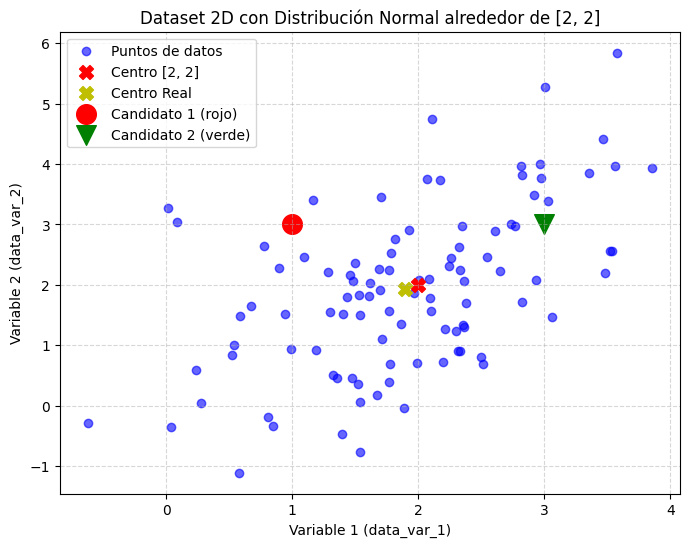

Centro real del cluster: x=1.90, y=1.92
Centro del cluster utilizado para el ejemplo: x=2.00, y=2.00
Visualización: Relación Cuadrática


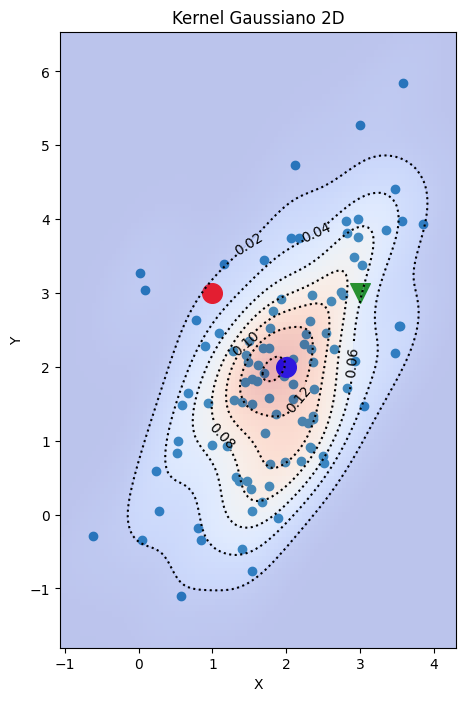

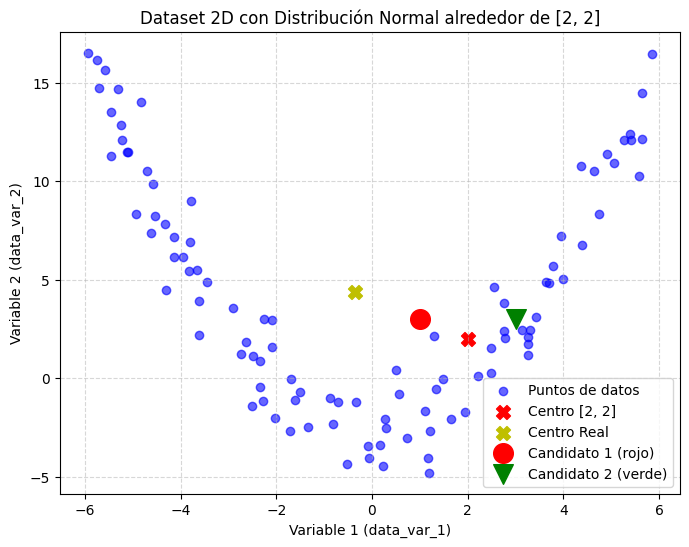

Centro real del cluster: x=-0.36, y=4.37
Centro del cluster utilizado para el ejemplo: x=2.00, y=2.00


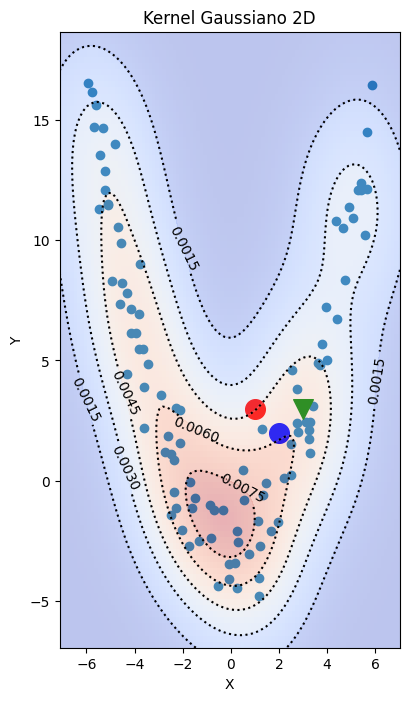

In [8]:
# --- TODO 1.1 Crear y visualizar el dataset con RELACIÓN LINEAL ---
dxr, dyr = cargar_datasetRelacionLineal(factor=np.array([1, 1.2]), n_data_points=100, ds_center=ds_center)

print("Visualización: Relación Lineal")
# Gráfico de dispersión simple con candidatos
visualize_scatter(dxr, dyr, ds_center, c1, c2)
# Gráfico con densidad de Kernel (mapa de calor)
visualize_dataset(dxr, dyr, ds_center, c1, c2)


# --- TODO 1.2 Crear y visualizar el dataset con RELACIÓN CUADRÁTICA ---
dx2, dy2 = cargar_datasetRelacionCuadratica(coeficientes=np.array([0.5, 0, -2]), n_data_points=100, rango_x=(-6, 6))

print("Visualización: Relación Cuadrática")
# Gráfico de dispersión simple con candidatos
visualize_scatter(dx2, dy2, ds_center, c1, c2)
# Gráfico con densidad de Kernel (mapa de calor)
visualize_dataset(dx2, dy2, ds_center, c1, c2)

In [9]:
# Dataset grande
dxGrande, dyGrande =cargar_datasetRelacionLineal([20,10], 1000, [50,100])

# 🎯 **EJ 2: IDENTIFIQUE QUE TAN DEPENDIENTES SON LOS DATASETS**

In [10]:
# TODO 2.1 : Use la covarianza para identificar qué tan dependiente es la relación

# 1. Dataset Distribución Normal (Independientes)
cov_norm = np.cov(dx, dy)
print(f'Covarianza dataset con distribución normal:\n{cov_norm}\n')

# 2. Dataset Relación Lineal (Dependencia fuerte positiva)
cov_lin = np.cov(dxr, dyr)
print(f'Covarianza dataset con relación lineal :\n{cov_lin}\n')

# 3. Dataset Grande (Escala mayor)
cov_grande = np.cov(dxGrande, dyGrande)
print(f'Covarianza dataset con relación lineal Grande:\n{cov_grande}\n')

# 4. Dataset Relación Cuadrática (Dependencia no lineal)
cov_quad = np.cov(dx2, dy2)
print(f'Covarianza dataset con relación cuadratica:\n{cov_quad}\n')

Covarianza dataset con distribución normal:
[[0.87173739 0.08985489]
 [0.08985489 0.76444418]]

Covarianza dataset con relación lineal :
[[0.82476989 0.68298486]
 [0.68298486 1.85085751]]

Covarianza dataset con relación lineal Grande:
[[383.54554143 375.65364293]
 [375.65364293 467.25326789]]

Covarianza dataset con relación cuadratica:
[[12.74399275 -2.89219318]
 [-2.89219318 34.90752565]]



### 📈 **RESULTADOS:**
**Conteste las siguientes preguntas**

¿Qué dataset tiene una mayor dependencia lineal entre sus dos variables?

-> Basándome en el valor numérico de la covarianza, el Dataset con relación lineal Grande (375.65) aparenta tener la mayor dependencia.

¿Cual es el problema que tiene la covarianza?

-> El problema principal es que no está normalizada, ya que, depende de la escala de los datos.
Por ejemplo, en el dataset Lineal Pequeño: Covarianza = 0.68.
y en el dataset Lineal Grande: Covarianza = 375.65. Se puede ver que ambos tienen un comportamiento lineal, pero como el segundo dataset usa valores mucho más grandes, la covarianza se infla.

In [11]:
# TODO 2.2: Use el coeficiente de correlación de Pearson
# La función np.corrcoef devuelve la matriz de correlación normalizada (-1 a 1)

print(f'Correlación dataset con distribución normal:\n{np.corrcoef(dx, dy)}\n')

print(f'Correlación dataset con relación lineal :\n{np.corrcoef(dxr, dyr)}\n')

print(f'Correlación dataset con relación lineal Grande:\n{np.corrcoef(dxGrande, dyGrande)}\n')

Correlación dataset con distribución normal:
[[1.         0.11007179]
 [0.11007179 1.        ]]

Correlación dataset con relación lineal :
[[1.         0.55278746]
 [0.55278746 1.        ]]

Correlación dataset con relación lineal Grande:
[[1.         0.88736636]
 [0.88736636 1.        ]]



### 📈 **RESULTADOS:**
**Conteste las siguientes preguntas**

¿Qué dataset tiene una mayor dependencia lineal entre sus dos variables?

-> El Dataset con relación lineal Grande. Porque su coeficiente es 0.88, que es el valor más cercano a 1.0 entre los tres. Esto indica una relación lineal positiva fuerte.

¿Que medida es mas facil de interpretar para identificar la dependencia entre dos variables de un dataset?

-> El Coeficiente de Correlación de Pearson. Porque es una medida normalizada que siempre varía entre -1 y 1. Ya que, un 0 siempre significa "sin relación lineal", y un 1 o -1 siempre significa "relación lineal perfecta".

# 🎯 **EJ 3: CREE LAS FUNCIONES DE LAS MEDIDAS DE DISIMILITUD**

In [12]:
#  TODO 3.1 completar el codigo de las funciones de las siguientes medidas de disimilitud:
#  Distancia Euclidiana, Distancia Manhattan, Distancia Chebyshev, Similitud de Coseno, Mahalanobis y Jaccard
#  En scipy.spatial.distance tenemos disponibles las distancias minkowski, mahalanobis, jaccard, hamming, euclidean, cosine, entre otras.
#  En numpy tenemos la norma p =  np.linalg.norm

In [13]:
def distancia_euclidiana(p1, p2):
   dist = np.linalg.norm(p2 - p1, ord= 2)
   print(f'Distancia euclidiana del punto {p1} al punto {p2} = {dist}')
   return dist

In [14]:
#Distancia Manhattan
def distancia_manhattan(p1, p2):
    dist = np.linalg.norm(p2 - p1, ord=1)
    print(f'Distancia Manhattan del punto {p1} al punto {p2} = {dist:.4f}')
    return dist

In [15]:
# ← COMPLETAR Chebyshev, Similitud de Coseno, Mahalanobis y Jaccard

In [16]:
# 3. Distancia Chebyshev
def distancia_chebyshev(p1, p2):
    dist = np.linalg.norm(p2 - p1, ord=np.inf)
    print(f'Distancia Chebyshev del punto {p1} al punto {p2} = {dist:.4f}')
    return dist

In [17]:
# 4. Similitud de Coseno
def similitud_coseno(p1, p2):
    # Similitud = 1 - Distancia Coseno
    sim = 1 - distance.cosine(p1, p2)
    print(f'Similitud de Coseno del punto {p1} al punto {p2} = {sim:.4f}')
    return sim

In [18]:
# 5. Distancia de Mahalanobis
def distancia_mahalanobis(p1, p2, VI):
    dist = distance.mahalanobis(p1, p2, VI)
    print(f'Distancia Mahalanobis del punto {p1} al punto {p2} = {dist:.4f}')
    return dist

In [19]:
# 6. Distancia de Jaccard
def distancia_jaccard(p1, p2):
    dist = distance.jaccard(p1, p2)
    print(f'Distancia Jaccard del punto {p1} al punto {p2} = {dist:.4f}')
    return dist

In [23]:
from scipy.spatial import distance
print("🔍 calculando las distancias de los puntos candidatos al centro")

# ---------------------------------------------------------
# 1. DATASET DISTRIBUCIÓN NORMAL (dx, dy)
# ---------------------------------------------------------
print('Distancias primer dataset (Normal):\n')
ds_center = np.array([np.mean(dx), np.mean(dy)])

# Matriz inversa necesaria para Mahalanobis
VI = np.linalg.inv(np.cov(dx, dy))

print(f"--- Para Candidato 1 {c1} ---")
distancia_euclidiana(c1, ds_center)
distancia_manhattan(c1, ds_center)
distancia_chebyshev(c1, ds_center)
similitud_coseno(c1, ds_center)
distancia_mahalanobis(c1, ds_center, VI)
distancia_jaccard(c1, ds_center)

print(f"\n--- Para Candidato 2 {c2} ---")
distancia_euclidiana(c2, ds_center)
distancia_manhattan(c2, ds_center)
distancia_chebyshev(c2, ds_center)
similitud_coseno(c2, ds_center)
distancia_mahalanobis(c2, ds_center, VI)
distancia_jaccard(c2, ds_center)


# ---------------------------------------------------------
# 2. DATASET RELACIÓN LINEAL (dxr, dyr)
# ---------------------------------------------------------
print('\nDistancias segundo dataset (Lineal):\n')
ds_center_r = np.array([np.mean(dxr), np.mean(dyr)])
VI_r = np.linalg.inv(np.cov(dxr, dyr))

print(f"--- Para Candidato 1 {c1} ---")
distancia_euclidiana(c1, ds_center_r)
distancia_manhattan(c1, ds_center_r)
distancia_chebyshev(c1, ds_center_r)
similitud_coseno(c1, ds_center_r)
distancia_mahalanobis(c1, ds_center_r, VI_r)
distancia_jaccard(c1, ds_center_r)

print(f"\n--- Para Candidato 2 {c2} ---")
distancia_euclidiana(c2, ds_center_r)
distancia_manhattan(c2, ds_center_r)
distancia_chebyshev(c2, ds_center_r)
similitud_coseno(c2, ds_center_r)
distancia_mahalanobis(c2, ds_center_r, VI_r)
distancia_jaccard(c2, ds_center_r)


# ---------------------------------------------------------
# 3. DATASET RELACIÓN CUADRÁTICA (dx2, dy2)
# ---------------------------------------------------------
print('\nDistancias tercer dataset (Cuadrática):\n')
ds_center_2 = np.array([np.mean(dx2), np.mean(dy2)])
VI_2 = np.linalg.inv(np.cov(dx2, dy2))

print(f"--- Para Candidato 1 {c1} ---")
distancia_euclidiana(c1, ds_center_2)
distancia_manhattan(c1, ds_center_2)
distancia_chebyshev(c1, ds_center_2)
similitud_coseno(c1, ds_center_2)
distancia_mahalanobis(c1, ds_center_2, VI_2)
distancia_jaccard(c1, ds_center_2)

print(f"\n--- Para Candidato 2 {c2} ---")
distancia_euclidiana(c2, ds_center_2)
distancia_manhattan(c2, ds_center_2)
distancia_chebyshev(c2, ds_center_2)
similitud_coseno(c2, ds_center_2)
distancia_mahalanobis(c2, ds_center_2, VI_2)
distancia_jaccard(c2, ds_center_2)

🔍 calculando las distancias de los puntos candidatos al centro
Distancias primer dataset (Normal):

--- Para Candidato 1 [1 3] ---
Distancia euclidiana del punto [1 3] al punto [1.77452609 2.01778087] = 1.2508577416548483
Distancia Manhattan del punto [1 3] al punto [1.77452609 2.01778087] = 1.7567
Distancia Chebyshev del punto [1 3] al punto [1.77452609 2.01778087] = 0.9822
Similitud de Coseno del punto [1 3] al punto [1.77452609 2.01778087] = 0.9212
Distancia Mahalanobis del punto [1 3] al punto [1.77452609 2.01778087] = 1.4771
Distancia Jaccard del punto [1 3] al punto [1.77452609 2.01778087] = 0.0000

--- Para Candidato 2 [3 3] ---
Distancia euclidiana del punto [3 3] al punto [1.77452609 2.01778087] = 1.5705224324671165
Distancia Manhattan del punto [3 3] al punto [1.77452609 2.01778087] = 2.2077
Distancia Chebyshev del punto [3 3] al punto [1.77452609 2.01778087] = 1.2255
Similitud de Coseno del punto [3 3] al punto [1.77452609 2.01778087] = 0.9979
Distancia Mahalanobis del punto

np.float64(0.0)

### 📈 **RESULTADOS:**
**Conteste las siguientes preguntas**

¿Qué medidas de disimilitud son de un punto a otro punto?

-> Euclidiana, Manhattan, Chebyshev, Coseno y Jaccard, porque, estas fórmulas solo necesitan las coordenadas de los dos puntos (p1 y p2) para calcular el resultado.

¿Qué medidas de disimilitud son de un punto a una distribución?

-> Distancia de Mahalanobis, porque para calcularla, es necesario la Matriz de Covarianza (y su inversa) de todo el conjunto de datos. Esto significa que la distancia entre dos puntos cambia dependiendo del contexto (la nube de puntos) en el que se encuentran. Mide qué tan lejos está un punto del centro en términos de desviaciones estándar, no en metros o unidades fijas.

¿La distancia de Mahalanobis es capaz de tener en cuenta la distribución real de los datos?

-> Sí. Es su característica principal. Porque el dataset lineal tiene una fuerte correlación, ya que, en este ejercicio se verifica que, el Candidato 2 se aleja del centro siguiendo la dirección de la línea (la correlación). Mahalanobis "perdona" esta distancia porque es una variación esperada dentro de esa distribución, mientras que, el Candidato 1 se aleja perpendicularmente a la línea. Mahalanobis castiga severamente esta distancia porque es "raro" o improbable encontrar un dato allí según la covarianza del grupo.

# 🔄 **EJ 4: MATRIZ DE DISTANCIAS**

Cree un metodo que sea capaz de calcular la matriz de distancias de todos los puntos de un dataset, recive como parametros la medida de disimilitud y en algunos casos la matriz de covarianza

In [24]:
import itertools as it
import numpy as np

# TODO 4.1 completar el codigo
def matriz_distancias(X, distancia, mC=None):
    n_samples = X.shape[0]
    mD = np.zeros((n_samples, n_samples))

    for pair in it.product(np.arange(n_samples), repeat=2):
        if mC is not None:
            mD[pair] = distancia(X[pair[0]], X[pair[1]], mC)
        else:
            mD[pair] = distancia(X[pair[0]], X[pair[1]])

    return mD

--- 1. DATASET NORMAL ---
Distancia euclidiana del punto [2.49671415 2.32408397] al punto [2.49671415 2.32408397] = 0.0
Distancia euclidiana del punto [2.49671415 2.32408397] al punto [1.8617357  1.61491772] = 0.9519004187135587
Distancia euclidiana del punto [2.49671415 2.32408397] al punto [2.64768854 1.323078  ] = 1.0123271291088105
Distancia euclidiana del punto [2.49671415 2.32408397] al punto [3.52302986 2.61167629] = 1.0658486127228506
Distancia euclidiana del punto [2.49671415 2.32408397] al punto [1.76584663 3.03099952] = 1.0168072296719541
Distancia euclidiana del punto [2.49671415 2.32408397] al punto [1.76586304 2.93128012] = 0.9501739362700208
Distancia euclidiana del punto [2.49671415 2.32408397] al punto [3.57921282 1.16078248] = 1.5890480537201892
Distancia euclidiana del punto [2.49671415 2.32408397] al punto [2.76743473 1.69078762] = 0.6887335415445033
Distancia euclidiana del punto [2.49671415 2.32408397] al punto [1.53052561 2.33126343] = 0.9662152128101167
Distanci

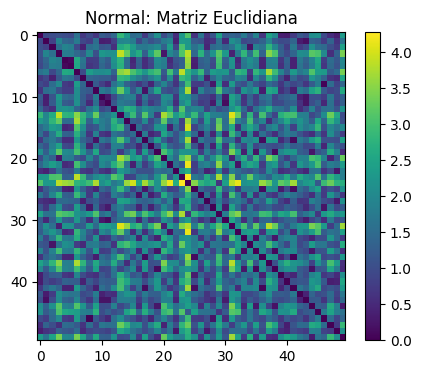

Distancia Mahalanobis del punto [2.49671415 2.32408397] al punto [2.49671415 2.32408397] = 0.0000
Distancia Mahalanobis del punto [2.49671415 2.32408397] al punto [1.8617357  1.61491772] = 1.0056
Distancia Mahalanobis del punto [2.49671415 2.32408397] al punto [2.64768854 1.323078  ] = 1.1809
Distancia Mahalanobis del punto [2.49671415 2.32408397] al punto [3.52302986 2.61167629] = 1.1190
Distancia Mahalanobis del punto [2.49671415 2.32408397] al punto [1.76584663 3.03099952] = 1.1929
Distancia Mahalanobis del punto [2.49671415 2.32408397] al punto [1.76586304 2.93128012] = 1.1089
Distancia Mahalanobis del punto [2.49671415 2.32408397] al punto [3.57921282 1.16078248] = 1.8699
Distancia Mahalanobis del punto [2.49671415 2.32408397] al punto [2.76743473 1.69078762] = 0.8142
Distancia Mahalanobis del punto [2.49671415 2.32408397] al punto [1.53052561 2.33126343] = 1.0421
Distancia Mahalanobis del punto [2.49671415 2.32408397] al punto [2.54256004 2.97554513] = 0.7458
Distancia Mahalanobi

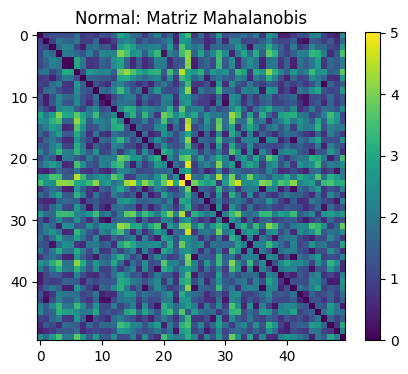

Se truncaron las últimas líneas 5000 del resultado de transmisión.
Distancia euclidiana del punto [2.32408397 2.62467539] al punto [2.49671415 0.79826926] = 1.8345464076945748
Distancia euclidiana del punto [2.32408397 2.62467539] al punto [1.8617357  1.35696131] = 1.3493942743371958
Distancia euclidiana del punto [2.32408397 2.62467539] al punto [2.64768854 2.23643112] = 0.5054241102994071
Distancia euclidiana del punto [2.32408397 2.62467539] al punto [3.52302986 2.56029713] = 1.2006730612001635
Distancia euclidiana del punto [2.32408397 2.62467539] al punto [1.76584663 1.57230377] = 1.191266114627859
Distancia euclidiana del punto [2.32408397 2.62467539] al punto [1.76586304 2.25072407] = 0.6719004325621688
Distancia euclidiana del punto [2.32408397 2.62467539] al punto [3.57921282 5.8426359 ] = 3.4540727042032837
Distancia euclidiana del punto [2.32408397 2.62467539] al punto [2.76743473 2.9769281 ] = 0.5662524801011387
Distancia euclidiana del punto [2.32408397 2.62467539] al punt

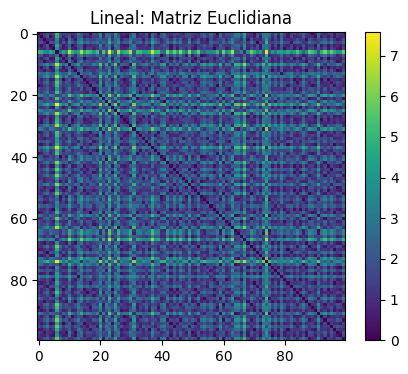

Se truncaron las últimas líneas 5000 del resultado de transmisión.
Distancia Mahalanobis del punto [2.32408397 2.62467539] al punto [1.53052561 1.83958608] = 0.8811
Distancia Mahalanobis del punto [2.32408397 2.62467539] al punto [2.54256004 2.45322494] = 0.3930
Distancia Mahalanobis del punto [2.32408397 2.62467539] al punto [ 1.53658231 -0.76594315] = 2.5665
Distancia Mahalanobis del punto [2.32408397 2.62467539] al punto [1.53427025 1.5024536 ] = 0.9627
Distancia Mahalanobis del punto [2.32408397 2.62467539] al punto [2.24196227 2.31423852] = 0.2322
Distancia Mahalanobis del punto [2.32408397 2.62467539] al punto [0.08671976 3.04261029] = 3.1750
Distancia Mahalanobis del punto [2.32408397 2.62467539] al punto [0.27508217 0.04424901] = 2.3870
Distancia Mahalanobis del punto [2.32408397 2.62467539] al punto [1.43771247 1.79956928] = 0.9793
Distancia Mahalanobis del punto [2.32408397 2.62467539] al punto [0.98716888 0.94551476] = 1.5562
Distancia Mahalanobis del punto [2.32408397 2.624

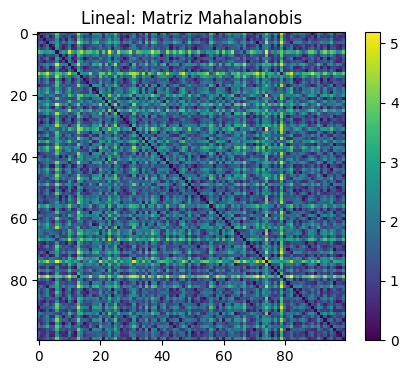

Se truncaron las últimas líneas 5000 del resultado de transmisión.
Distancia euclidiana del punto [ 5.63501553 12.13306604] al punto [-1.50551857 -0.71347858] = 14.697650702780585
Distancia euclidiana del punto [ 5.63501553 12.13306604] al punto [ 5.40857168 12.0999833 ] = 0.22884773997912886
Distancia euclidiana del punto [ 5.63501553 12.13306604] al punto [2.7839273  2.03665145] = 10.491248344386168
Distancia euclidiana del punto [ 5.63501553 12.13306604] al punto [ 1.18390181 -4.79789155] = 17.506277114792944
Distancia euclidiana del punto [ 5.63501553 12.13306604] al punto [-4.12777631  6.1325818 ] = 11.459402941750723
Distancia euclidiana del punto [ 5.63501553 12.13306604] al punto [-4.12806576  7.14908614] = 10.961651880438795
Distancia euclidiana del punto [ 5.63501553 12.13306604] al punto [-5.30299665 14.66241304] = 11.22665162990684
Distancia euclidiana del punto [ 5.63501553 12.13306604] al punto [4.39411375 6.74181047] = 5.532221421373592
Distancia euclidiana del punto [ 5

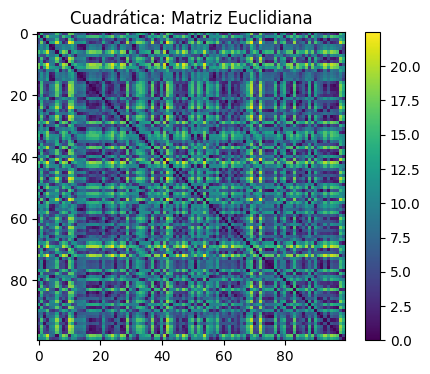

Se truncaron las últimas líneas 5000 del resultado de transmisión.
Distancia Mahalanobis del punto [ 5.63501553 12.13306604] al punto [ 1.21338014 -2.6870398 ] = 2.9740
Distancia Mahalanobis del punto [ 5.63501553 12.13306604] al punto [2.49687093 0.23394291] = 2.3273
Distancia Mahalanobis del punto [ 5.63501553 12.13306604] al punto [-5.75298607 16.15980013] = 3.1995
Distancia Mahalanobis del punto [ 5.63501553 12.13306604] al punto [ 5.63891823 14.4773976 ] = 0.4007
Distancia Mahalanobis del punto [ 5.63501553 12.13306604] al punto [3.98931169 5.02477079] = 1.3590
Distancia Mahalanobis del punto [ 5.63501553 12.13306604] al punto [-3.45193067  4.86141366] = 3.0038
Distancia Mahalanobis del punto [ 5.63501553 12.13306604] al punto [-3.81810039  5.45983022] = 3.0467
Distancia Mahalanobis del punto [ 5.63501553 12.13306604] al punto [-3.79914588  6.92185354] = 2.9261
Distancia Mahalanobis del punto [ 5.63501553 12.13306604] al punto [-2.34909308 -0.47669986] = 3.3278
Distancia Mahalanob

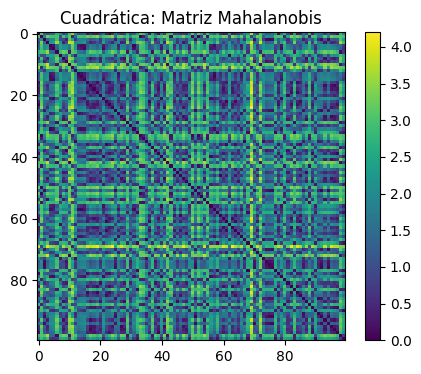

In [26]:
import matplotlib.pyplot as plt

# ==========================================
# 1. DATASET DISTRIBUCIÓN NORMAL (dx, dy)
# ==========================================
print("--- 1. DATASET NORMAL ---")
X = np.column_stack((dx, dy))

# Matriz Euclidiana
Ma_euclidiana = matriz_distancias(X, distancia_euclidiana)
plt.figure(figsize=(5, 4))
plt.title("Normal: Matriz Euclidiana")
plt.imshow(Ma_euclidiana, cmap='viridis')
plt.colorbar()
plt.show()

# Matriz Mahalanobis
# calculamos primero la matriz de covarianzas (y su inversa para la formula)
mC = np.linalg.inv(np.cov(dx, dy))
Ma_mahalanobis = matriz_distancias(X, distancia_mahalanobis, mC)
print('Matriz distancias (Normal - Mahalanobis):\n', Ma_mahalanobis)

plt.figure(figsize=(5, 4))
plt.title("Normal: Matriz Mahalanobis")
plt.imshow(Ma_mahalanobis, cmap='viridis')
plt.colorbar()
plt.show()


# ==========================================
# 2. DATASET RELACIÓN LINEAL (dxr, dyr)
# ==========================================
print("\n--- 2. DATASET RELACIÓN LINEAL ---")
X = np.column_stack((dxr, dyr))

# Matriz Euclidiana
Ma_euclidiana = matriz_distancias(X, distancia_euclidiana)
plt.figure(figsize=(5, 4))
plt.title("Lineal: Matriz Euclidiana")
plt.imshow(Ma_euclidiana, cmap='viridis')
plt.colorbar()
plt.show()

# Matriz Mahalanobis
# calculamos primero la matriz de covarianzas (y su inversa)
mC = np.linalg.inv(np.cov(dxr, dyr))
Ma_mahalanobis = matriz_distancias(X, distancia_mahalanobis, mC)
print('Matriz distancias (Lineal - Mahalanobis):\n', Ma_mahalanobis)

plt.figure(figsize=(5, 4))
plt.title("Lineal: Matriz Mahalanobis")
plt.imshow(Ma_mahalanobis, cmap='viridis')
plt.colorbar()
plt.show()


# ==========================================
# 3. DATASET RELACIÓN CUADRÁTICA (dx2, dy2)
# ==========================================
print("\n--- 3. DATASET RELACIÓN CUADRÁTICA ---")
X = np.column_stack((dx2, dy2))

# Matriz Euclidiana
Ma_euclidiana = matriz_distancias(X, distancia_euclidiana)
plt.figure(figsize=(5, 4))
plt.title("Cuadrática: Matriz Euclidiana")
plt.imshow(Ma_euclidiana, cmap='viridis')
plt.colorbar()
plt.show()

# Matriz Mahalanobis
# calculamos primero la matriz de covarianzas (y su inversa)
mC = np.linalg.inv(np.cov(dx2, dy2))
Ma_mahalanobis = matriz_distancias(X, distancia_mahalanobis, mC)
print('Matriz distancias (Cuadrática - Mahalanobis):\n', Ma_mahalanobis)

plt.figure(figsize=(5, 4))
plt.title("Cuadrática: Matriz Mahalanobis")
plt.imshow(Ma_mahalanobis, cmap='viridis')
plt.colorbar()
plt.show()

Se truncaron las últimas líneas 5000 del resultado de transmisión.
Distancia Mahalanobis del punto [2.32408397 2.62467539] al punto [2.49671415 0.79826926] = 1.7475
Distancia Mahalanobis del punto [2.32408397 2.62467539] al punto [1.8617357  1.35696131] = 0.9319
Distancia Mahalanobis del punto [2.32408397 2.62467539] al punto [2.64768854 2.23643112] = 0.6797
Distancia Mahalanobis del punto [2.32408397 2.62467539] al punto [3.52302986 2.56029713] = 1.6163
Distancia Mahalanobis del punto [2.32408397 2.62467539] al punto [1.76584663 1.57230377] = 0.8055
Distancia Mahalanobis del punto [2.32408397 2.62467539] al punto [1.76586304 2.25072407] = 0.6196
Distancia Mahalanobis del punto [2.32408397 2.62467539] al punto [3.57921282 5.8426359 ] = 2.3670
Distancia Mahalanobis del punto [2.32408397 2.62467539] al punto [2.76743473 2.9769281 ] = 0.4884
Distancia Mahalanobis del punto [2.32408397 2.62467539] al punto [1.53052561 1.83958608] = 0.8811
Distancia Mahalanobis del punto [2.32408397 2.62467

Text(0.5, 1.0, 'Mahalanobis')

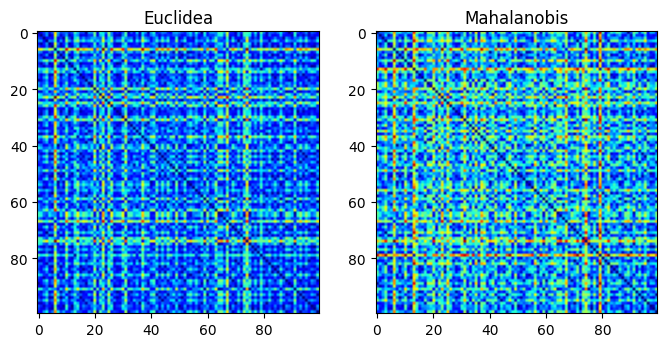

In [25]:
import matplotlib.pyplot as plt

X = np.column_stack((dxr, dyr))

print("Calculando matriz Euclidiana...")
Ma_euclidea = matriz_distancias(X, distancia_euclidiana)

print("Calculando matriz Mahalanobis...")
mC = np.linalg.inv(np.cov(dxr, dyr))
Ma_mahalanobis = matriz_distancias(X, distancia_mahalanobis, mC)
fig, ax = plt.subplots(1, 2)
ax[0].imshow(Ma_euclidea, cmap='jet')
ax[0].set_title('Euclidea')
ax[1].imshow(Ma_mahalanobis, cmap='jet')
ax[1].set_title('Mahalanobis')

In [26]:
#Hasta ahora hemos visto todo disimilitudes (distancias). ¿Y si quisiéramos una medida de similitud?
def matriz_similitud(X, distancia, mC=None):
    if mC is not None:
        mD = matriz_distancias(X, distancia, mC)
    else:
        mD = matriz_distancias(X, distancia)

    # 2. Transformación a Similitud
    mS = 1 / (1 + mD)

    return mS

Se truncaron las últimas líneas 5000 del resultado de transmisión.
Distancia Mahalanobis del punto [2.32408397 2.62467539] al punto [2.49671415 0.79826926] = 1.7475
Distancia Mahalanobis del punto [2.32408397 2.62467539] al punto [1.8617357  1.35696131] = 0.9319
Distancia Mahalanobis del punto [2.32408397 2.62467539] al punto [2.64768854 2.23643112] = 0.6797
Distancia Mahalanobis del punto [2.32408397 2.62467539] al punto [3.52302986 2.56029713] = 1.6163
Distancia Mahalanobis del punto [2.32408397 2.62467539] al punto [1.76584663 1.57230377] = 0.8055
Distancia Mahalanobis del punto [2.32408397 2.62467539] al punto [1.76586304 2.25072407] = 0.6196
Distancia Mahalanobis del punto [2.32408397 2.62467539] al punto [3.57921282 5.8426359 ] = 2.3670
Distancia Mahalanobis del punto [2.32408397 2.62467539] al punto [2.76743473 2.9769281 ] = 0.4884
Distancia Mahalanobis del punto [2.32408397 2.62467539] al punto [1.53052561 1.83958608] = 0.8811
Distancia Mahalanobis del punto [2.32408397 2.62467

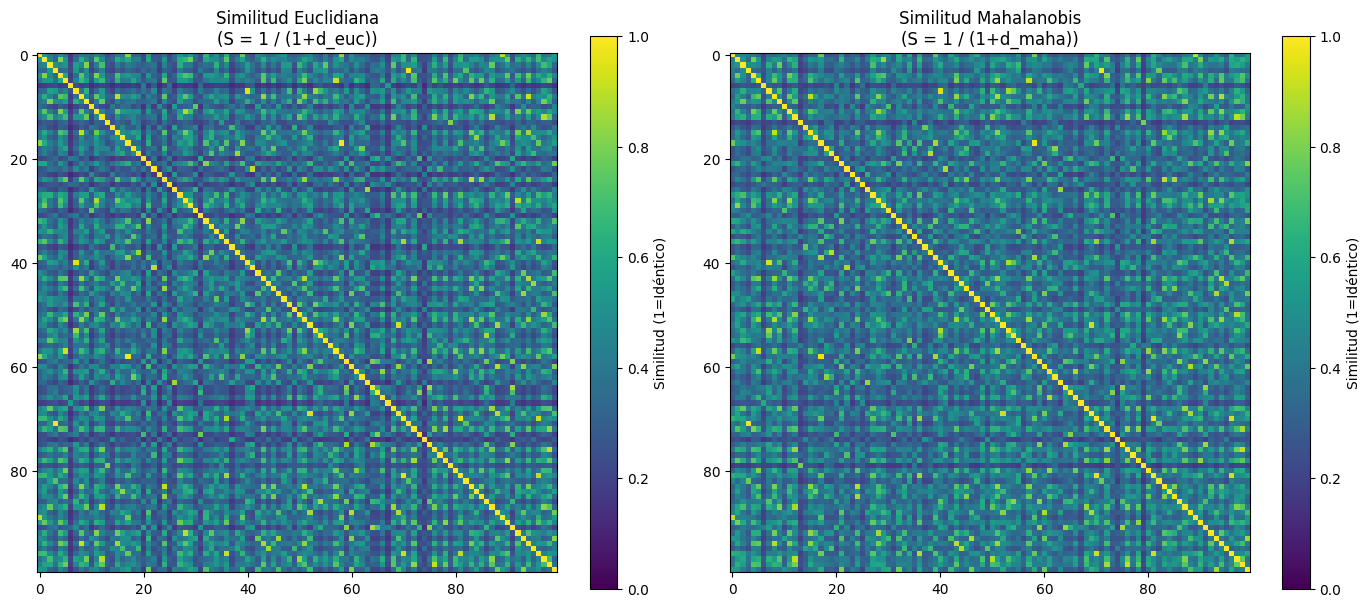

In [27]:
# Complete 4.3 Grafique la matriz de similitud

import matplotlib.pyplot as plt

print(">>> Calculando y graficando Matrices de Similitud (Dataset Lineal)...")
X_lineal = np.column_stack((dxr, dyr))

# --- A. Similitud basada en Euclidiana ---
mS_euclidea = matriz_similitud(X_lineal, distancia_euclidiana)

# --- B. Similitud basada en Mahalanobis ---
cov_lineal = np.cov(dxr, dyr)
mC_inv_lineal = np.linalg.inv(cov_lineal)
mS_mahalanobis = matriz_similitud(X_lineal, distancia_mahalanobis, mC_inv_lineal)


# --- C. GRAFICAR ---
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Mapa de calor Euclidiana
im1 = ax[0].imshow(mS_euclidea, cmap='viridis', vmin=0, vmax=1, interpolation='nearest')
ax[0].set_title('Similitud Euclidiana\n(S = 1 / (1+d_euc))')
cbar1 = fig.colorbar(im1, ax=ax[0])
cbar1.set_label('Similitud (1=Idéntico)')

# Mapa de calor Mahalanobis
im2 = ax[1].imshow(mS_mahalanobis, cmap='viridis', vmin=0, vmax=1, interpolation='nearest')
ax[1].set_title('Similitud Mahalanobis\n(S = 1 / (1+d_maha))')
cbar2 = fig.colorbar(im2, ax=ax[1])
cbar2.set_label('Similitud (1=Idéntico)')

plt.tight_layout()
plt.show()

# ✅ **RESULTADOS:**
¿Cual grafico es mas facil de interpretar: el de una medida de disimilitud o de similitud?

-> La matriz de similitud es superior visualmente porque alinea la importancia de los datos con la intensidad del color. Ya que, en Similitud: La diagonal siempre es el valor máximo (1.0 o amarillo brillante). Y en, disimilitud: La diagonal es 0 (negro o azul oscuro). haciendo más difícil orientarse.



# 🚀 ¡TALLER FINALIZADO!"